**Keyword Extraction using TF-IDF**

In [1]:
import numpy as np 
import pandas as pd 
import nltk as nlp

In [2]:
df = pd.read_csv("papers.csv")

In [3]:
df.shape

(7241, 7)

In [4]:
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7241 entries, 0 to 7240

Data columns (total 7 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   id          7241 non-null   int64 

 1   year        7241 non-null   int64 

 2   title       7241 non-null   object

 3   event_type  2422 non-null   object

 4   pdf_name    7241 non-null   object

 5   abstract    7241 non-null   object

 6   paper_text  7241 non-null   object

dtypes: int64(2), object(5)

memory usage: 396.1+ KB


In [7]:
df.describe()

,id,year
count,7241.000000,7241.000000
mean,3655.912167,2006.439718
std,2098.435219,8.759919
min,1.000000,1987.000000
25%,1849.000000,2000.000000
50%,3659.000000,2009.000000
75%,5473.000000,2014.000000
max,7284.000000,2017.000000


In [10]:
print('missing Abstarct content: ')
sum(df.abstract == "Abstract Missing")

missing Abstarct content: 


3317

In [12]:
print(df.paper_text[1][:500], "...")
print("\ntotal length", len(df.paper_text[1]))

683



A MEAN FIELD THEORY OF LAYER IV OF VISUAL CORTEX

AND ITS APPLICATION TO ARTIFICIAL NEURAL NETWORKS*

Christopher L. Scofield

Center for Neural Science and Physics Department

Brown University

Providence, Rhode Island 02912

and

Nestor, Inc., 1 Richmond Square, Providence, Rhode Island,

02906.

ABSTRACT

A single cell theory for the development of selectivity and

ocular dominance in visual cortex has been presented previously

by Bienenstock, Cooper and Munrol. This has been extended to a

network  ...



total length 15505


Preprocessing...

In [13]:
import re
df.paper_text = df.paper_text.apply(lambda x: re.sub("(\W)", " ", x))

In [14]:
tokenizer = nlp.WordPunctTokenizer()
df["word_count"] = df.paper_text.apply(lambda x: len(tokenizer.tokenize(x)))
df[["word_count", "paper_text"]].head()

,word_count,paper_text
0,3721,767 SELF ORGANIZATION OF ASSOCIATIVE DATABASE...
1,2606,683 A MEAN FIELD THEORY OF LAYER IV OF VISUAL...
2,3219,394 STORING COVARIANCE BY THE ASSOCIATIVE LON...
3,3461,Bayesian Query Construction for Neural Network...
4,3401,Neural Network Ensembles Cross Validation an...


In [15]:
freq = pd.Series(" ".join(df.paper_text).split()).value_counts()
print(freq.head(10))
print(freq.tail(10))

the    1751648

of     1000114

and     746124

a       634129

to      571971

1       552095

is      504044

in      479663

for     354288

0       331281

Name: count, dtype: int64

CVPR08           1

ICML09           1

apl              1

mixednorms       1

Iabels           1

epf              1

BasisFunction    1

c2Y              1

q2Y              1

Terzopoulus      1

Name: count, dtype: int64


In [16]:
lemma = nlp.WordNetLemmatizer()
df.paper_text = df.paper_text.apply(lambda x: lemma.lemmatize(x))

In [17]:
df.paper_text = df.paper_text.apply(lambda x: x.lower())

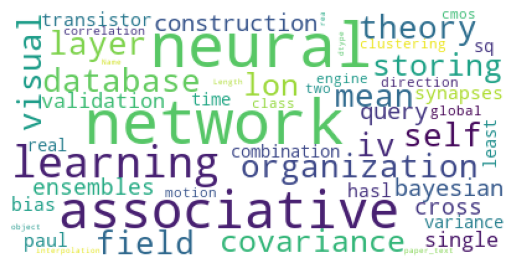

In [18]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopword_list = set(stopwords.words("english"))

word_cloud = WordCloud(
                          background_color='white',
                          stopwords=stopword_list,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(df.paper_text))
print(word_cloud)
fig = plt.figure(1)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

stopword_list = list(stopword_list)

# TF-IDF Vectorizer
tf_idf = TfidfVectorizer(
    max_df=0.8, 
    stop_words=stopword_list, 
    max_features=10000, 
    ngram_range=(1, 3)
    )

tf_idf.fit(df.paper_text)

TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1, 3),
                stop_words=['hadn', "haven't", 'further', 'down', 'we',
                            "doesn't", 'both', 'more', 'shan', 'i', "won't",
                            'isn', 'ourselves', 'each', 'not', 'am',
                            'themselves', 'at', 'ain', 'no', 'did', 'you',
                            "needn't", 'between', 'after', 'then', 'had', 'if',
                            'wouldn', 're', ...])

In [22]:
doc = pd.Series(df.paper_text[500])
doc_vector = tf_idf.transform(doc)

In [24]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(doc_vector.tocoo())
#extract only the top n; n here is 10
feature_names = tf_idf.get_feature_names_out()
keywords=extract_topn_from_vector(feature_names,sorted_items,5)

In [25]:
# now print the results
print("\nAbstract:")
print(doc[0][:1000])



Abstract:

receptive field formation in natural scene environments  comparison of single cell learning rules  brian s  blais brown university physics department providence  rl 02912  n lntrator school of mathematical sciences tel aviv university ramat aviv  69978 israel  h  shouval institute for brain and neural systems brown university providence  rl 02912 leon n cooper brown university physics department and institute for brain and neural systems brown university providence  rl 02912  abstract we study several statistically and biologically motivated learning rules using the same visual environment  one made up of natural scenes  and the same single cell neuronal architecture  this allows us to concentrate on the feature extraction and neuronal coding properties of these rules  included in these rules are kurtosis and skewness maximization  the quadratic form of the bcm learning rule  and single cell ica  using a structure removal method  we demonstrate that receptive fields develo

In [26]:
print("Keywords:")
for k in keywords:
    print(k,keywords[k])

Keywords:

rules 0.324

learning rules 0.291

receptive 0.248

receptive fields 0.216

cooper 0.21
